# Results Extraction
After running the codes in the folder Iterative Active Learning process, this example code can be used to extract the results and create a plot as it appears in the thesis. 

In [91]:
import json

def openresults(folderurl, resulttype, rangetuple):
    results = []
    for iterationnumber in range(rangetuple[0],rangetuple[1], rangetuple[2]):
        url = folderurl + str(iterationnumber) + "iteration_mAP_treshold0_5.json"
        
        with open(url, "r") as f:
            diction = json.load(f)
        result = diction["segm"][resulttype]
        results.append(result)
    return results


In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def multiplotter(linelistvalues, valuelist2, labellist, label2, rangeset, benchmarkline=None):
    plt.figure(figsize=(12,6))
    sns.set(font_scale=1, style='whitegrid')
    #sns.set_style('ticks')
    #sns.set_style("whitegrid")
    paper_rc = {'lines.linewidth': 1, 'lines.markersize': 7} 
    sns.set_context('paper', font_scale=1.8, rc=paper_rc)  

    sns.lineplot(x = range(0,len(valuelist2)), y=valuelist2, marker='X', markersize=10, label = label2)

    for number, valuelist in enumerate(linelistvalues):
        sns.lineplot(x = range(0,len(valuelist)), y=valuelist, marker='X', markersize=10, label = labellist[number])
        plt.gca().fill_between(range(0,len(valuelist)), valuelist, valuelist2, alpha=0.2, color='pink')
    
    if benchmarkline:
        plt.axhline(benchmarkline, label="Benchmark", color="red", linewidth=2)

    # Creating the other items of the plot
    plt.legend(loc="lower right")
    plt.tick_params(axis='x', labelsize=18)
    plt.tick_params(axis='y', labelsize=18)
    plt.xticks(np.arange(0, len(valuelist), 1), labels=range(rangeset[0], rangeset[1],rangeset[2]), fontsize=13)
    plt.yticks(np.arange(0, max(valuelist + valuelist2), 10), fontsize=15)

    plt.xlabel('Nr. of annotated images', fontsize=18)
    plt.ylabel('mAP on test set', fontsize=18)


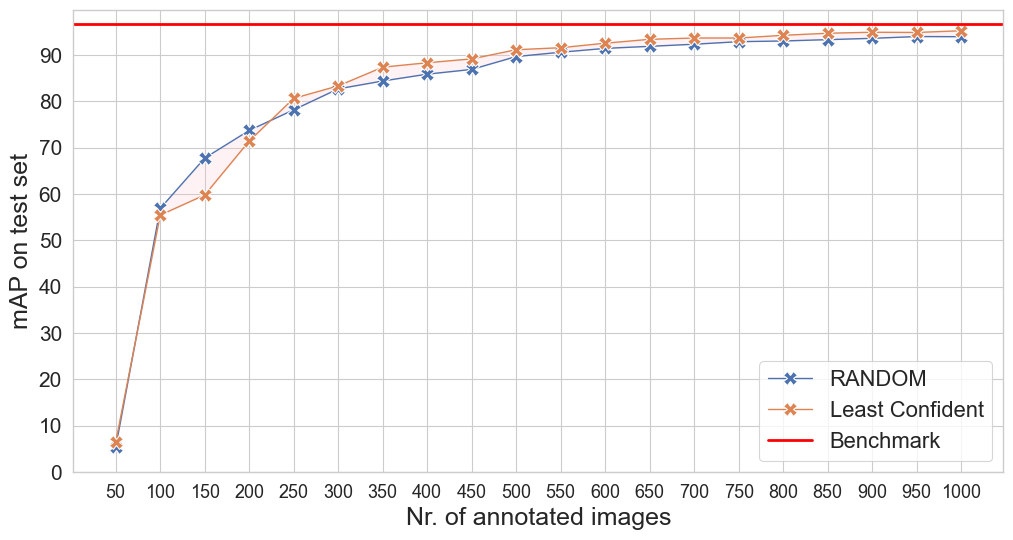

In [93]:
PLOTRANGE_SUBSET1 = (50,1001,50)

maprandom = openresults("./Iterative Active Learning Process/RANDOM/", "AP", PLOTRANGE_SUBSET1)
mapleastconfident = openresults("./Iterative Active Learning Process/leastconfident/", "AP", PLOTRANGE_SUBSET1)

multiplotter([mapleastconfident], maprandom, ["Least Confident"], "RANDOM", (50,1001,50), 96.72)
plt.savefig("./plots/"+"subset1leastconfident"+'.pdf', bbox_inches='tight')

In [94]:
print(maprandom)
print(mapleastconfident)

[5.355017244507605, 56.889079034120414, 67.7666970578877, 73.73461036412968, 78.18243947484282, 82.70687263256674, 84.40442689288324, 85.880501562116, 86.90270221627975, 89.68079749628026, 90.6147541530517, 91.4438456251573, 91.8863199861274, 92.34510310515623, 92.89282970167942, 93.0436426282747, 93.33246744934878, 93.6168889108587, 94.00072796069573, 93.96962365716679]
[6.4631456850883335, 55.45034150721334, 59.796669261883906, 71.44063152202497, 80.66155824440305, 83.34600518085962, 87.39067363286763, 88.3451545879161, 89.17966040984186, 91.1560922897754, 91.59270257648802, 92.5647773549368, 93.40322017869485, 93.68581798178136, 93.68551441248222, 94.26784526146861, 94.716442510263, 94.93160347767748, 94.88398214057504, 95.25457557455984]
93.40322017869485
91.8863199861274
